In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


## About Dataset

* Data Science Job Salaries Dataset contains 11 columns, each are:

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year


## Veri Kümesi Hakkında

* Veri Bilimi İş Maaşları Veri Kümesi 11 sütun içerir, her biri:

* work_year: Maaşın ödendiği yıl.
* deneyim_seviyesi: Yıl boyunca işteki deneyim düzeyi
* istihdam_türü: Rol için istihdam türü
* job_title: Yıl boyunca çalışılan rol.
* maaş: Ödenen toplam brüt maaş tutarı.
* maaş_para birimi: ISO 4217 para birimi kodu olarak ödenen maaşın para birimi.
* maaşinusd: USD cinsinden maaş
* staff_residence: ISO 3166 ülke kodu olarak çalışanın çalışma yılı boyunca birincil ikamet ettiği ülke.
* remote_ratio: Uzaktan yapılan toplam iş miktarı
* şirket_konumu: İşverenin ana ofisi veya sözleşmeli şubesinin bulunduğu ülke
* company_size: Yıl boyunca şirket için çalışan ortalama kişi sayısı

## Analysis Content 

* 1.[Python Libraries](#1)
* 2.[data loading](#2)
* 3.[EDA](#3)
* 4.[data Preprocessing](#4)
* 5.[Modelling](#5) 

<a id="1"></a>
## 1.Python Libraries

In [2]:
#Let's load the relevant libraries (İlgili kütüphaneleri yükleyelim);

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [3]:
df=pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


<a id="3"></a>
## 3.EDA

In [5]:
df.shape

(3755, 11)

In [6]:
# There are 11 attributes and 3755 observations in our dataset
# Verisetimizde 11 öznitelik ve 3755 gözlem var

In [7]:
# colums

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [8]:
# information data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
# Verisetimizde eksik değer yok,4 sayısal ve 7 kategorik değişken var
# There are no missing values n our dataset, there are 4 numeric and 7 categorical variables

In [10]:
df.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T

,count,mean,std,min,15%,25%,35%,50%,65%,75%,90%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2022.0,2022.0,2023.0,2023.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,75000.0,100000.0,115000.0,138000.0,160000.0,180000.0,228600.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,72020.0,95000.0,110820.0,135000.0,155000.0,175000.0,219000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0


In [11]:
# Sayısal özniteliklerimiz için istatiksel özete erişmiş olduk
# We have the statistical summary for our numeric attributes

In [12]:
# categorical statistical  summary 

df.describe(include="object").T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [13]:
# her bir öznitelikteki benzersiz değer sayısı
# number of unique values ​​in each attribute

df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [14]:
# hepsini bir fonksiyon aracılığıyla çağıralım
# call them all via a function

def summary(data):
    print("******shape******")
    print(data.shape)
    print("******columns******")
    print(data.columns)
    print("******information data******")
    print(data.info())
    print("******missing values******")
    print(data.isna().sum())
    print("******Quantiles*****")
    print(data.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T)
    print("*********nunique********")
    print(data.nunique())

In [15]:
summary(df)

******shape******
(3755, 11)
******columns******
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
******information data******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  compa

In [16]:
df.select_dtypes("object").columns.to_list()

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [17]:
for i in df.select_dtypes("object").columns.to_list():
    print(df[i].value_counts())
    print("*"*36)

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
************************************
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
************************************
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64
************************************
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       

In [18]:
df.job_title.nunique()

93

In [19]:
# istatistiksel özetlerimize bakalım(categorik)

In [20]:
df.groupby("company_size").describe().T

company_size                    L             M             S
work_year     count  4.540000e+02  3.153000e+03  1.480000e+02
              mean   2.021775e+03  2.022501e+03  2.021493e+03
              std    8.651758e-01  5.621992e-01  9.439865e-01
              min    2.020000e+03  2.020000e+03  2.020000e+03
              25%    2.021000e+03  2.022000e+03  2.021000e+03
              50%    2.022000e+03  2.023000e+03  2.022000e+03
              75%    2.022000e+03  2.023000e+03  2.022000e+03
              max    2.023000e+03  2.023000e+03  2.023000e+03
salary        count  4.540000e+02  3.153000e+03  1.480000e+02
              mean   4.387944e+05  1.507128e+05  2.814301e+05
              std    1.779806e+06  1.593233e+05  9.912145e+05
              min    8.000000e+03  7.500000e+03  6.000000e+03
              25%    8.000000e+04  1.020000e+05  4.800000e+04
              50%    1.313000e+05  1.400000e+05  7.300000e+04
              75%    1.996100e+05  1.800000e+05  1.251010e+05
              max    3.040000e+07  6.600000e+06  8.500000e+06
salary_in_usd count  4.540000e+02  3.153000e+03  1.480000e+02
              mean   1.183010e+05  1.431305e+05  7.822668e+04
              std    7.583239e+04  5.899281e+04  6.195514e+04
              min    5.409000e+03  5.132000e+03  5.679000e+03
              25%    6.083075e+04  1.021000e+05  3.566800e+04
              50%    1.085000e+05  1.400000e+05  6.214600e+04
              75%    1.591750e+05  1.800000e+05  1.074818e+05
              max    4.238340e+05  4.500000e+05  4.160000e+05
remote_ratio  count  4.540000e+02  3.153000e+03  1.480000e+02
              mean   6.057269e+01  4.299080e+01  7.229730e+01
              std    4.226614e+01  4.913625e+01  3.836975e+01
              min    0.000000e+00  0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00  5.000000e+01
              50%    5.000000e+01  0.000000e+00  1.000000e+02
              75%    1.000000e+02  1.000000e+02  1.000000e+02
              max    1.000000e+02  1.000000e+02  1.000000e+02

In [21]:
df.groupby("experience_level").describe().T

experience_level               EN            EX            MI            SE
work_year     count  3.200000e+02  1.140000e+02  8.050000e+02  2.516000e+03
              mean   2.022053e+03  2.022386e+03  2.022204e+03  2.022468e+03
              std    9.098845e-01  7.585358e-01  7.937793e-01  5.916773e-01
              min    2.020000e+03  2.020000e+03  2.020000e+03  2.020000e+03
              25%    2.022000e+03  2.022000e+03  2.022000e+03  2.022000e+03
              50%    2.022000e+03  2.023000e+03  2.022000e+03  2.023000e+03
              75%    2.023000e+03  2.023000e+03  2.023000e+03  2.023000e+03
              max    2.023000e+03  2.023000e+03  2.023000e+03  2.023000e+03
salary        count  3.200000e+02  1.140000e+02  8.050000e+02  2.516000e+03
              mean   1.883812e+05  2.468022e+05  2.482003e+05  1.700490e+05
              std    5.290557e+05  5.481897e+05  1.302669e+06  2.833540e+05
              min    6.000000e+03  1.500000e+04  7.500000e+03  8.000000e+03
              25%    5.000000e+04  1.450000e+05  7.000000e+04  1.159340e+05
              50%    8.000000e+04  2.000000e+05  1.000000e+05  1.480000e+05
              75%    1.300000e+05  2.390000e+05  1.485000e+05  1.860000e+05
              max    6.600000e+06  6.000000e+06  3.040000e+07  7.500000e+06
salary_in_usd count  3.200000e+02  1.140000e+02  8.050000e+02  2.516000e+03
              mean   7.854628e+04  1.949309e+05  1.045259e+05  1.530511e+05
              std    5.222542e+04  7.066193e+04  5.438769e+04  5.689626e+04
              min    5.409000e+03  1.500000e+04  5.132000e+03  8.000000e+03
              25%    4.000000e+04  1.450000e+05  6.683700e+04  1.150000e+05
              50%    7.000000e+04  1.960000e+05  1.000000e+05  1.460000e+05
              75%    1.100092e+05  2.390000e+05  1.350000e+05  1.859000e+05
              max    3.000000e+05  4.160000e+05  4.500000e+05  4.238340e+05
remote_ratio  count  3.200000e+02  1.140000e+02  8.050000e+02  2.516000e+03
              mean   5.515625e+01  4.824561e+01  4.621118e+01  4.507154e+01
              std    4.440453e+01  4.884952e+01  4.752512e+01  4.932502e+01
              min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
              25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
              50%    5.000000e+01  5.000000e+01  5.000000e+01  0.000000e+00
              75%    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02
              max    1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02

In [22]:
df.groupby("employment_type").describe().T

employment_type                 CT            FL            FT             PT
work_year     count      10.000000  1.000000e+01  3.718000e+03      17.000000
              mean     2021.700000  2.021700e+03  2.022382e+03    2021.411765
              std         0.948683  9.486833e-01  6.848664e-01       0.795206
              min      2020.000000  2.020000e+03  2.020000e+03    2020.000000
              25%      2021.000000  2.021000e+03  2.022000e+03    2021.000000
              50%      2022.000000  2.022000e+03  2.022000e+03    2021.000000
              75%      2022.000000  2.022000e+03  2.023000e+03    2022.000000
              max      2023.000000  2.023000e+03  2.023000e+03    2023.000000
salary        count      10.000000  1.000000e+01  3.718000e+03      17.000000
              mean   113300.000000  2.887555e+05  1.911465e+05   79910.823529
              std    130281.575401  7.423627e+05  6.738885e+05   97131.736582
              min      7500.000000  1.200000e+04  6.000000e+03    8760.000000
              25%     29250.000000  4.666625e+04  1.000000e+05   14000.000000
              50%     75000.000000  5.000000e+04  1.389000e+05   50000.000000
              75%    103750.000000  9.000000e+04  1.800000e+05  110000.000000
              max    416000.000000  2.400000e+06  3.040000e+07  400000.000000
salary_in_usd count      10.000000  1.000000e+01  3.718000e+03      17.000000
              mean   113446.900000  5.180780e+04  1.383142e+05   39533.705882
              std    130176.746842  2.945888e+04  6.245218e+04   38312.145181
              min      7500.000000  1.200000e+04  5.132000e+03    5409.000000
              25%     30117.250000  3.428100e+04  9.559900e+04   12000.000000
              50%     75000.000000  5.000000e+04  1.350000e+05   21669.000000
              75%    103750.000000  5.750000e+04  1.750750e+05   52533.000000
              max    416000.000000  1.000000e+05  4.500000e+05  125404.000000
remote_ratio  count      10.000000  1.000000e+01  3.718000e+03      17.000000
              mean       95.000000  7.000000e+01  4.593868e+01      76.470588
              std        15.811388  3.496029e+01  4.863948e+01      25.724788
              min        50.000000  0.000000e+00  0.000000e+00      50.000000
              25%       100.000000  5.000000e+01  0.000000e+00      50.000000
              50%       100.000000  7.500000e+01  0.000000e+00     100.000000
              75%       100.000000  1.000000e+02  1.000000e+02     100.000000
              max       100.000000  1.000000e+02  1.000000e+02     100.000000

In [23]:
# en yüksek ve em düşük 30 kişinin maaşı

In [24]:
df.sort_values("salary",ascending=False).head(30)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3669,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
3646,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3574,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3475,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
2966,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L
3476,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
2358,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
3192,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L
1462,2023,MI,FT,Head of Data Science,5000000,INR,60795,IN,50,IN,L


In [25]:
df.sort_values("salary").head(30)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1548,2022,EN,FT,AI Developer,6000,EUR,6304,MK,0,MK,S
573,2023,EN,FT,Autonomous Vehicle Technician,7000,USD,7000,GH,0,GH,S
2933,2022,MI,CT,Analytics Engineer,7500,USD,7500,BO,50,BO,M
3681,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
2589,2022,SE,FT,Product Data Scientist,8000,USD,8000,IN,100,SG,L
3496,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,50,ES,M
3651,2021,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
3434,2022,EN,FT,Computer Vision Engineer,10000,USD,10000,PT,100,LU,M
2712,2022,MI,FT,Data Scientist,10000,USD,10000,TR,0,TR,M
2022,2022,SE,FT,3D Computer Vision Researcher,10000,USD,10000,CA,50,AL,S


In [26]:
df.select_dtypes("object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USD,US,US,L
3751,MI,FT,Principal Data Scientist,USD,US,US,L
3752,EN,FT,Data Scientist,USD,US,US,S
3753,EN,CT,Business Data Analyst,USD,US,US,L


### Data Visualize

In [27]:
# kategorik ve sayısal öznitelikler için listelerimizi oluşturalım
# let's create our lists for categorical and numeric attributes

In [28]:
cat_list=[i for i in df.select_dtypes("object")]
num_list=[i for i in df.select_dtypes(["int64"])]

In [29]:
num_list

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [30]:
cat_list

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [31]:
# categorical analysis

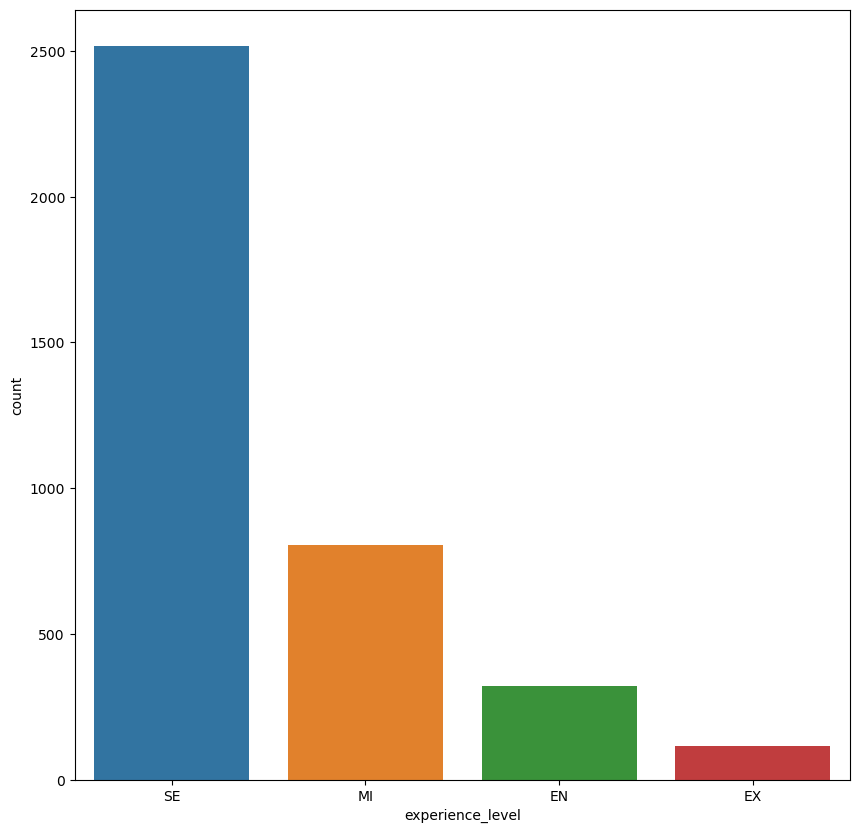

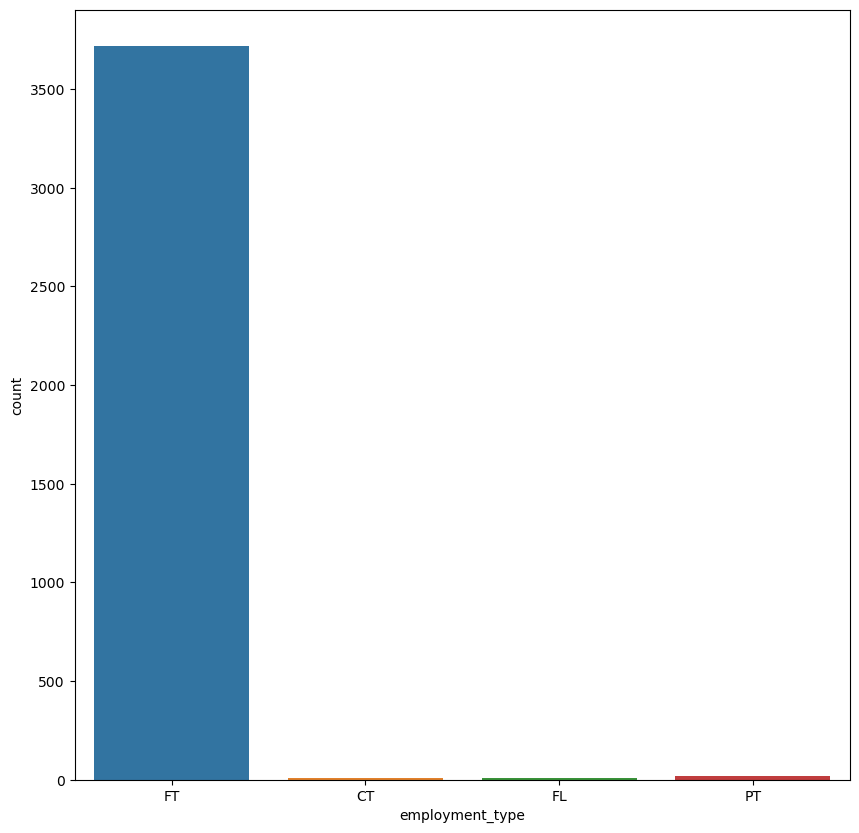

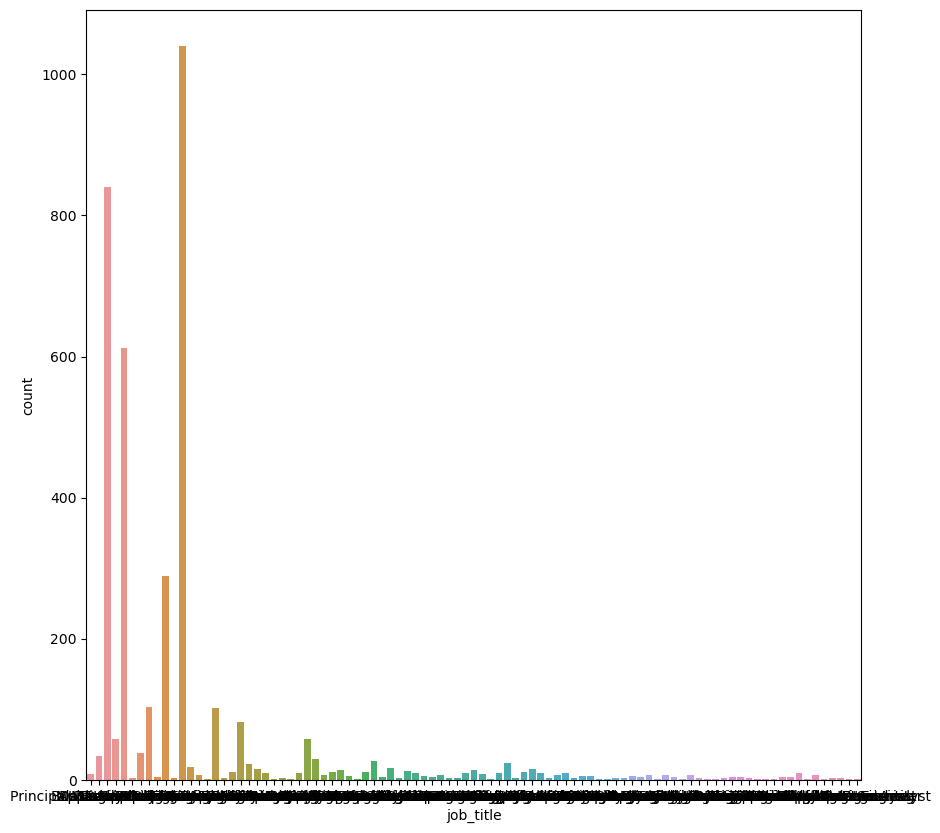

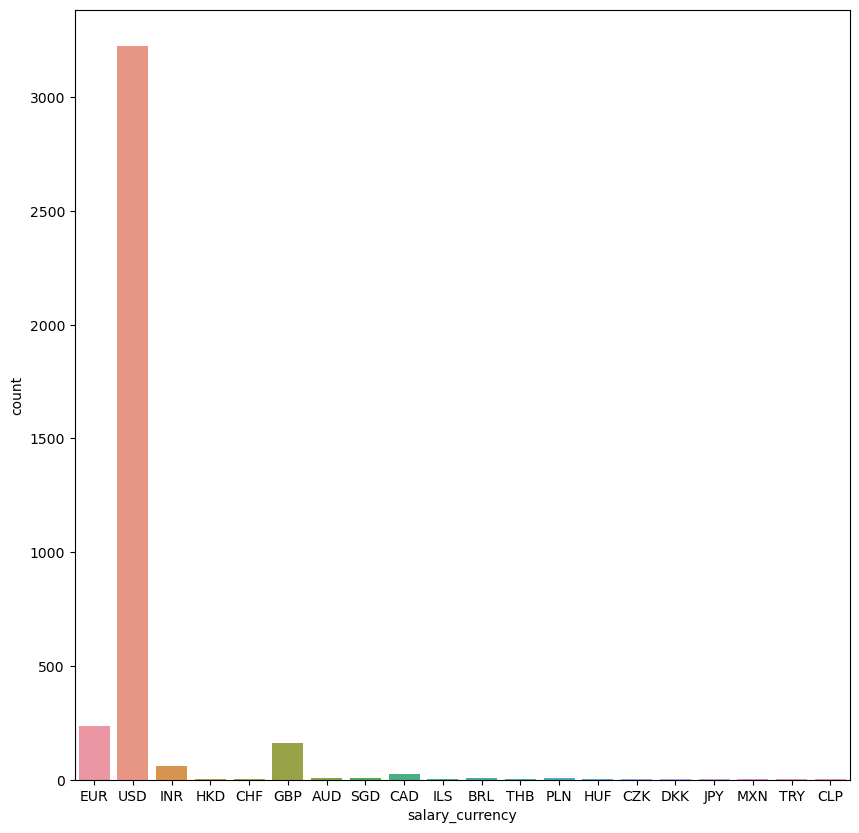

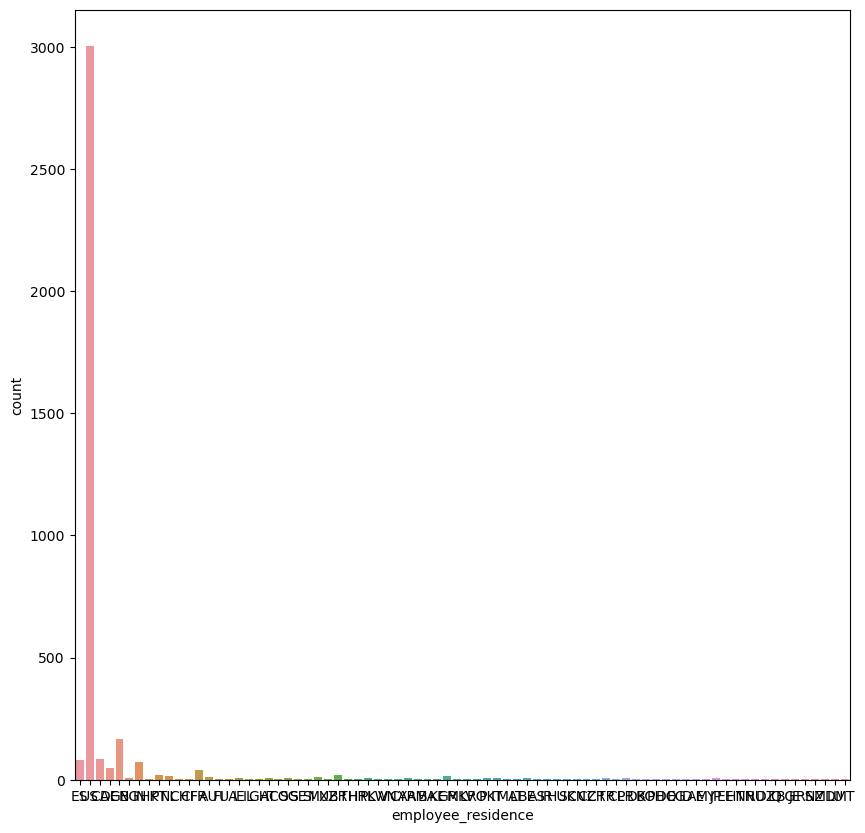

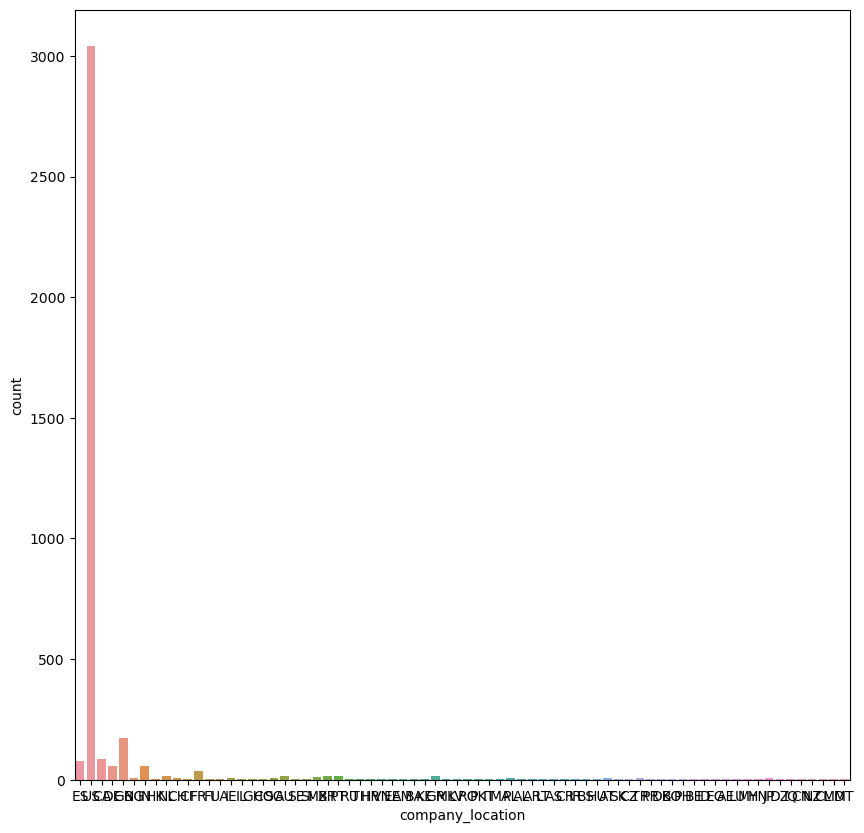

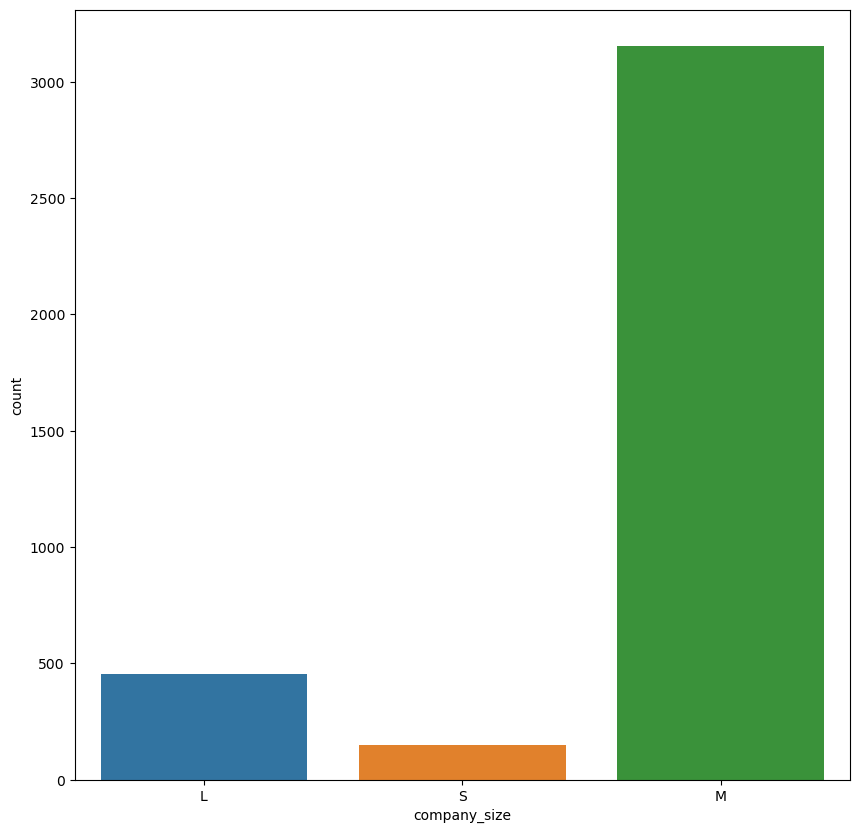

In [32]:
for i in cat_list:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=df.loc[:,cat_list])

In [33]:
# numerical analysis

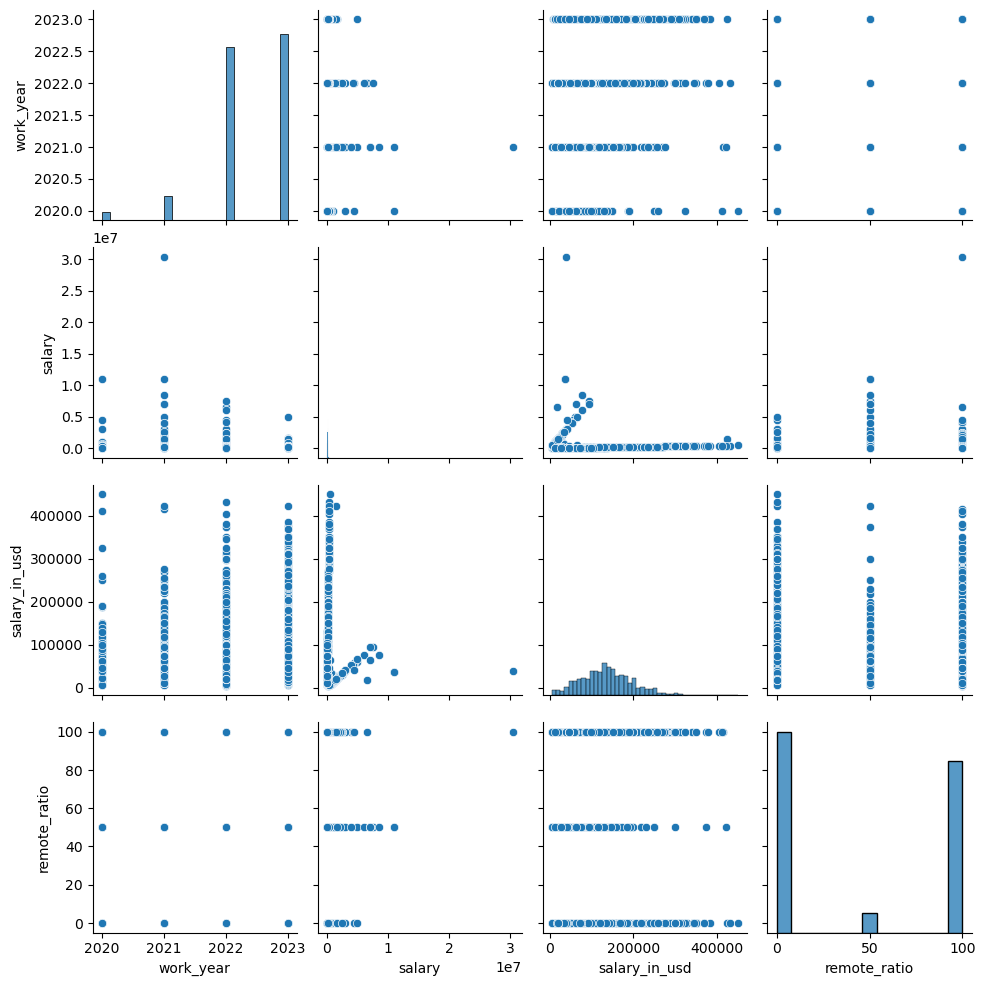

In [34]:
sns.pairplot(df.loc[:,num_list])

In [35]:
# sayısal değişkenler arasında ilişki yok

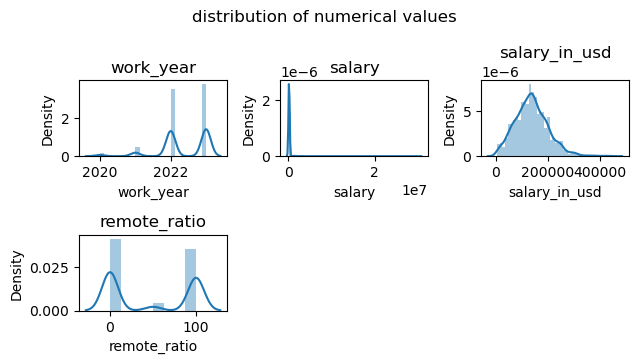

In [36]:
k=1
plt.suptitle("distribution of numerical values")

for i in num_list:
    plt.subplot(3,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1
    plt.tight_layout()


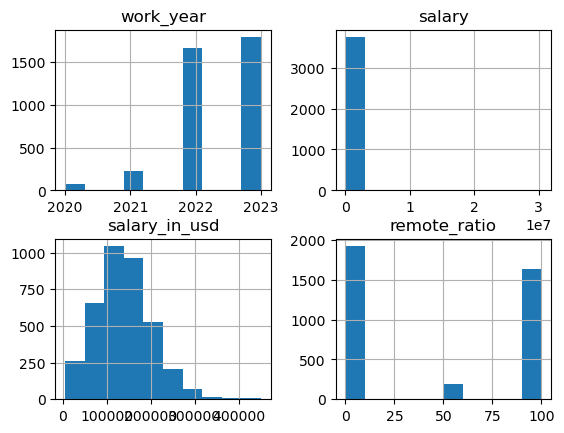

In [37]:
df.hist();

<a id="4"></a>
## 4.Data Preprocessing

In [38]:
# missing value query
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [39]:
# Verisetimizde eksik değer ypk

In [40]:
### Outlier Analysis


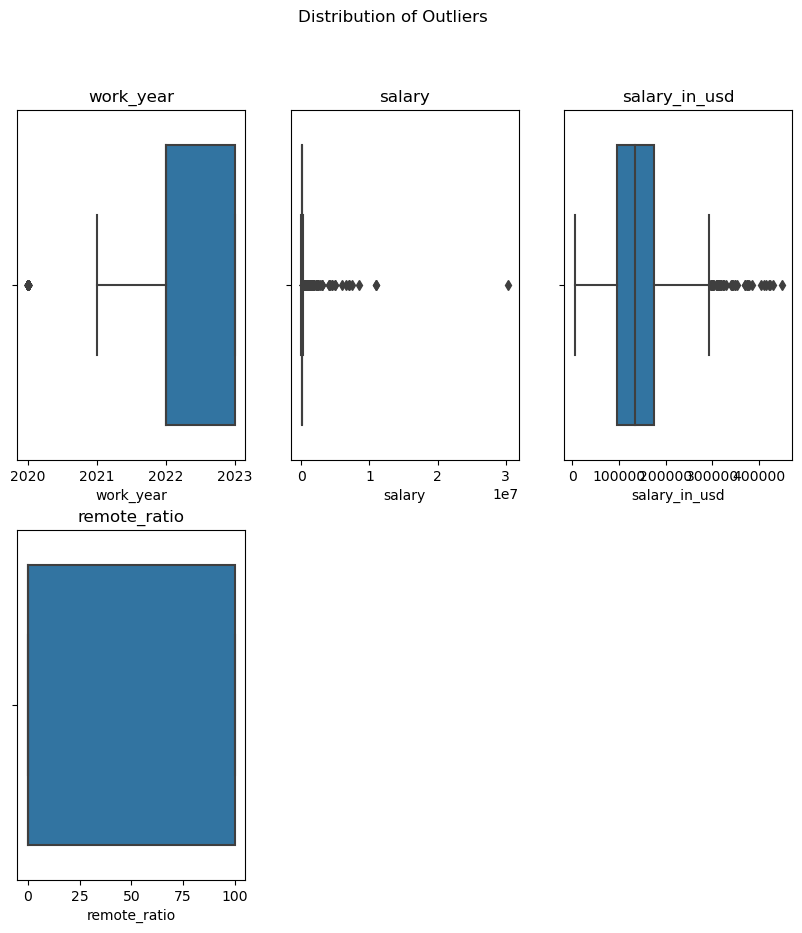

In [41]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in df.loc[:,num_list]:
    plt.subplot(2,3,k)
    sns.boxplot(x = i, data = df.loc[:,num_list])
    plt.title(i)
    k+=1

In [42]:
# Verisetimizde aykırı değerler görünüyor ancak aykırı değer analizi yapmayacağız(aynı tür değil)
# Outliers appear in our dataset, but we will not do outlier analysis (not the same type)

### Encoding

In [43]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())
    print("*"*39)


SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
***************************************
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
***************************************
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64
***************************************
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
H

In [44]:
### encoding

In [45]:
for i in cat_list:
    df[i] = df[i].factorize()[0]


In [46]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,0,80000,0,85847,0,100,0,0
1,2023,1,1,1,30000,1,30000,1,100,1,1
2,2023,1,1,1,25500,1,25500,1,100,1,1
3,2023,0,0,2,175000,1,175000,2,100,2,2
4,2023,0,0,2,120000,1,120000,2,100,2,2


### Correlation Analysis

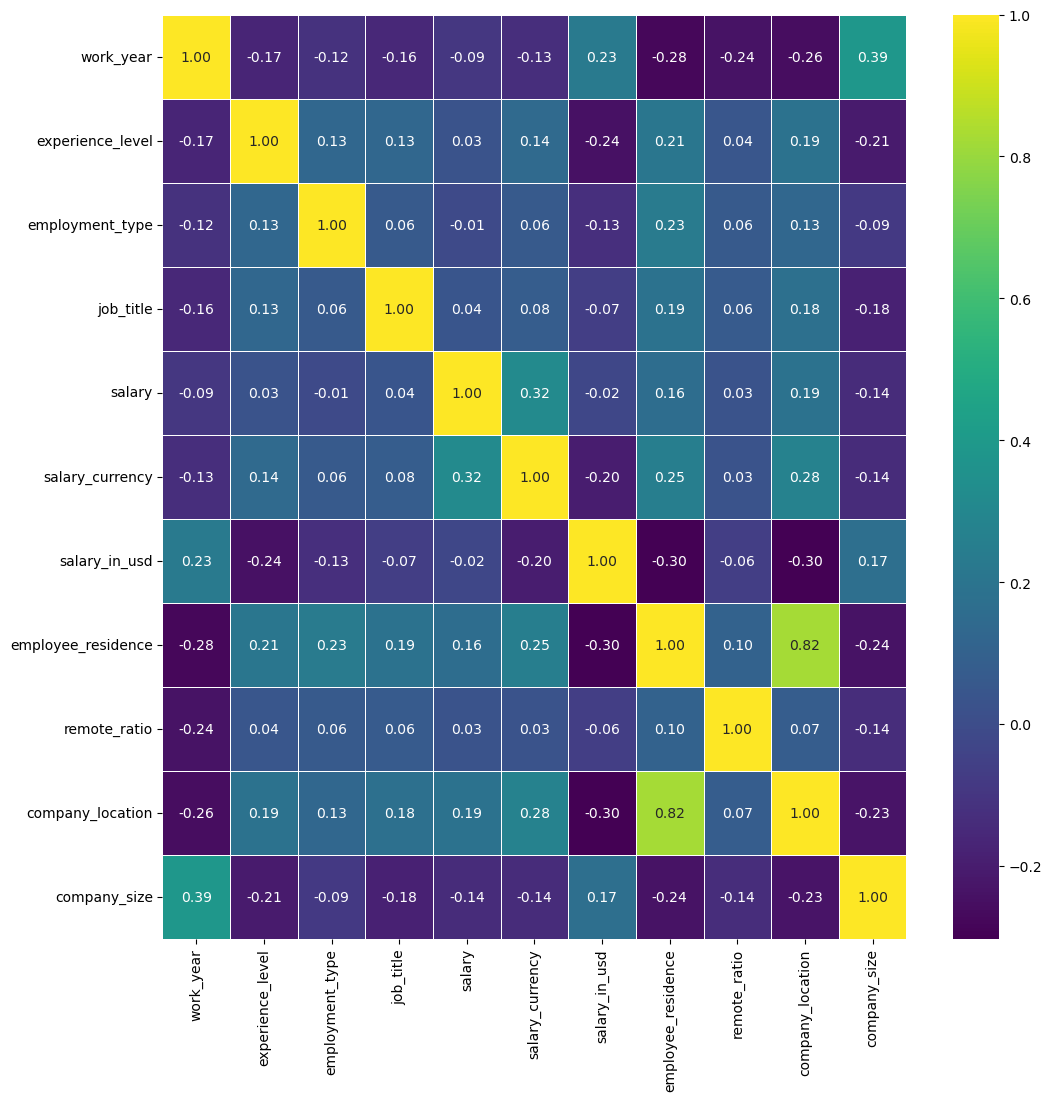

In [47]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,cmap="viridis",fmt=".2f");

In [48]:
# look at the importance levels according to the target variable
# hedef değişkene göre önem düzeylerine bakalım

In [49]:
cor=df.corr()["salary"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with salary":cor.values})

,column,Correlation with salary
0,salary,1.000000
1,salary_currency,0.317689
2,company_location,0.189461
3,employee_residence,0.158832
4,job_title,0.041307
5,experience_level,0.032708
6,remote_ratio,0.028731
7,employment_type,-0.007644
8,salary_in_usd,-0.023676
9,work_year,-0.094724


In [50]:
# Yüksek korelasyon diyebileceğimiz 1 tane özniteliğimiz var, özniteliği silmeyeceğiz
# We have 1 attribute that we can call high correlation, we will not delete the attribute

In [51]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,0,80000,0,85847,0,100,0,0
1,2023,1,1,1,30000,1,30000,1,100,1,1
2,2023,1,1,1,25500,1,25500,1,100,1,1
3,2023,0,0,2,175000,1,175000,2,100,2,2
4,2023,0,0,2,120000,1,120000,2,100,2,2


In [52]:
df.shape

(3755, 11)

<a id="5"></a>
## 5.Modelling

In [53]:
X=df.drop("salary",axis=1)
y=df["salary"]

In [54]:
# train,test split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [56]:
#yüklü olmayan  modellerin yüklenmesi ;
#loading unloaded models;

In [57]:
!pip install catboost

In [58]:
!pip install lightgbm

In [59]:
!pip install xgboost

In [60]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [61]:
# Modellerimizi kuralım

In [62]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)
rf=RandomForestRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)

In [63]:
models=[ridge,lasso,enet,knn,ada,mlpc,svm,dtc,rf,gbm,xgb,lgb]

In [64]:
def ML(y,models):
    y_pred=models.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    
    return mse,rmse,mape,r2

In [65]:
for i in models:
    print(i,"Algorithm succed rate :",ML("salary",i))

Ridge() Algorithm succed rate : (306655494120.1219, 553764.836478556, 1.5504697903761284, -0.015118389569277246)
Lasso() Algorithm succed rate : (306658147499.01733, 553767.2322366297, 1.5509492452789035, -0.015127173020944795)
ElasticNet() Algorithm succed rate : (301057364079.18915, 548686.945424428, 1.3893249801643541, 0.00341304019706834)
KNeighborsRegressor() Algorithm succed rate : (357334186162.09796, 597774.3605760437, 1.0120790291308344, -0.18287951968937333)
AdaBoostRegressor() Algorithm succed rate : (277814349962.21014, 527080.9709733507, 2.2427005291645936, 0.08035414026397725)
MLPRegressor() Algorithm succed rate : (301398339014.30005, 548997.5765104069, 0.6012614461052772, 0.0022843145304815016)
SVR() Algorithm succed rate : (305433098052.5912, 552660.0203132041, 0.5518236280571542, -0.011071904992022263)
DecisionTreeRegressor() Algorithm succed rate : (29779985609.99574, 172568.78515535692, 0.013209555237329501, 0.9014196333884256)
RandomForestRegressor() Algorithm succ

In [66]:
# 12 farklı model ve 4 farklı metrik ile modellerimizi karşılaştırdık,Xgboost ideal bir model 
#Xgboost için hiperparametre optimizasyonu yapacağız

In [67]:
#We compared our models with 12 different models and 4 different metrics, Xgboost is an ideal model
#We will do hyperparameter optimization for xgboost

In [68]:
## Xgboost değişken önem düzeyleri
## Xgboost variable severity levels

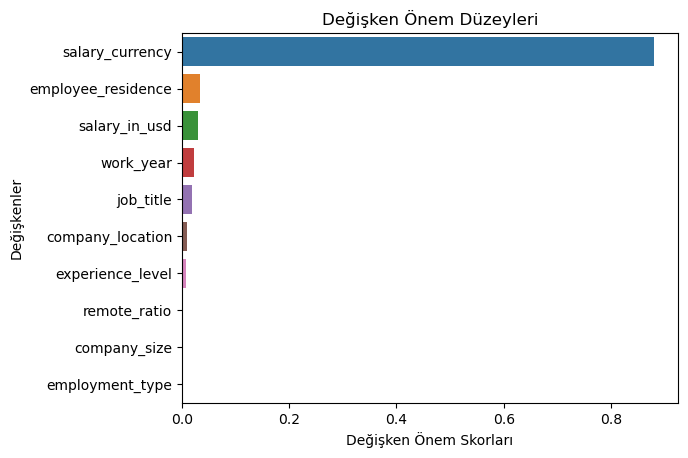

In [69]:
import seaborn as sns
feature_imp=pd.Series(xgb.feature_importances_,
                     index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()

### Model Tuning

#### 1.GridSearchCV

In [70]:
params={
    "learning_rate":[0.01,0.1,0.03,0.01],
    "n_estimators":[50,100,200],
    "max_depth":[3,4,5,6]
}

In [71]:
xgb_cv=GridSearchCV(xgb,params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [72]:
xgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [73]:
xgb_tun1=XGBRegressor(**xgb_cv.best_params_).fit(X_train,y_train)

In [74]:
y_pred1=xgb_tun1.predict(X_test)

In [75]:
mean_absolute_percentage_error(y_test,y_pred1)

0.1420188622737825

In [76]:
r2_score(y_test,y_pred1)

0.8616970147377149

In [77]:
# başarı oranımız arttı

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred1))

204400.9003862304

In [79]:
# Genel olarak modelimizde iyileşme var,optuna  için de modellerimizi deneyelim
# There is an improvement in our model in general, let's try our models for optuna 

#### 2.Optuna

In [80]:
!pip install optuna

In [81]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler


In [82]:
def return_score(param):
    model=XGBRegressor(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return mape,r2,rmse

In [83]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",50,500),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.5)
                

        
    }
    return(return_score(param))

In [84]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)

[I 2023-06-12 10:56:19,149] A new study created in memory with name: no-name-3a79a1da-01af-464e-9b4b-ce59b9d237b6
[W 2023-06-12 10:56:21,518] Trial 0 failed with parameters: {'n_estimators': 271, 'max_depth': 15, 'learning_rate': 0.4099570874623206} because of the following error: The number of the values 3 did not match the number of the objectives 1..
[W 2023-06-12 10:56:21,519] Trial 0 failed with value (0.0230784507251366, 0.8176043538145481, 234733.0603955603).
[W 2023-06-12 10:56:22,184] Trial 1 failed with parameters: {'n_estimators': 164, 'max_depth': 8, 'learning_rate': 0.1908617970273993} because of the following error: The number of the values 3 did not match the number of the objectives 1..
[W 2023-06-12 10:56:22,186] Trial 1 failed with value (0.025326308239039242, 0.81533032046002, 236191.80500020031).
[W 2023-06-12 10:56:22,957] Trial 2 failed with parameters: {'n_estimators': 373, 'max_depth': 4, 'learning_rate': 0.4078138525548497} because of the following error: The n

In [85]:
# best parametr {'n_estimators': 485, 'max_depth': 3, 'learning_rate': 0.4895140096881418} 
# with value (0.11866569563025414, 0.8893664939356084, 182814.3847453554).

In [86]:
#optuna daha başarılı sonuçlar verdi
#optuna gave more successful results

In [87]:
# En iyi başarı oranını optuna ile yakaladık
# We got the best success rate with optuna